In [2]:
from Environment import *
from ExactRL import *
from Plot_utilities import *

## Monte-Carlo based control
Load the simulator object that simulates the MDP's environment.

In [3]:
sim = simulator()

Load RL object for Monte-Carlo based control without state space  appproximation. 
As number of episodes increases, MC based control will converge to the optimal value function and policy.


In [4]:
RLMCobj = MC_ExactRL(config(), sim.init, sim.step)
RLMCobj.Monte_Carlo_Control(6000000)

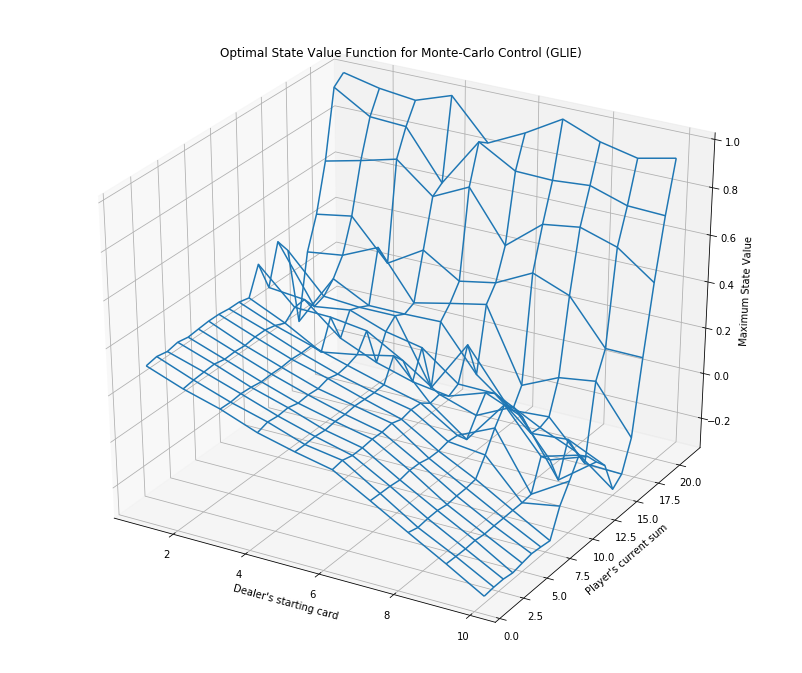

In [5]:
plot(RLMCobj , "Optimal State Value Function for Monte-Carlo Control (GLIE)")

## SARSA(Lambda) based control
We apply SARSA(Lambda) based on the backward-view mechanism.


In [10]:
RLSobj = SarsaL_ExactRL(config(), sim.init, sim.step, lamda = 0.5)
RLSobj.Apply_SARSA(episodes = 100000)

SASRA takes fewer episodes to converge (lower variance) but with higher bias. 


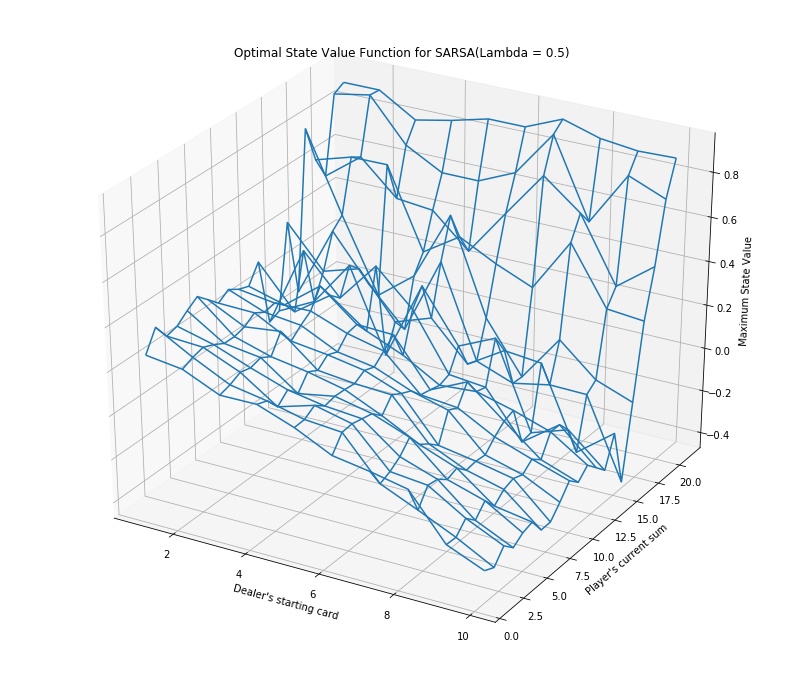

In [11]:
plot(RLSobj, "Optimal State Value Function for SARSA(Lambda = 0.5)")

## Comparing MC and SARSA 
SARSA estimate's divergence from the true value increases at higher values of Lambda. 


In [15]:
def MSE_Compute(Q2):
    la = np.linspace(0,1,11)
    Y = []
    for l1 in list(la):
        RLSobj = SarsaL_ExactRL(config(), sim.init, sim.step, lamda =l1)
        RLSobj.Apply_SARSA(1000)
        Y.append(MSE(RLSobj.Q, Q2))    
    plt.subplot(2, 1, 1)
    plt.plot(la, np.asarray(Y), 'r')
    plt.title('MSE(Q,Q*) as function of Lambda')
    plt.show()     

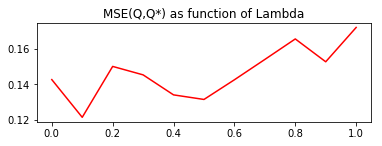

In [16]:
MSE_Compute(RLMCobj.Q)